# Chiffrement par substitution

Le texte à chiffrer ou déchiffrer est de la même nature que pour le chiffre de César.

La clé est différente ; ce que l'on donne à la fonction est une permutation de l'alphabet utilisé.

L'alphabet est abcdefghijklmnopqrstuvwxyz. Une permutation est par exemple ABCKUDEFGHILJONMQPTSRZWXYV


Les 5 fonctions que l'on va utiliser dans ce carnet sont : 
+ chiffre() : chiffrer un message par le code de César
+ dechiffre() : déchiffrer un message par le code de César
+ generer_cle() : générer une clé de chiffrement (i.e. une permutation de l'alphabet)
+ demonstration() : chiffrer et déchiffre un message avec une clé
+ print() : afficher un contenu

In [1]:
import random

def generer_cle():
    """générer une clé"""
    chars ='abcdefghijklmnopqrstuvwxyz'
    alphabet_melange = sorted(chars.upper(), key=lambda k: random.random())
    #pour garder les espaces et les retours à la ligne dans le texte
    chars=chars+" \n"
    alphabet_melange.append(" ")
    alphabet_melange.append("\n")
    return dict(zip(chars, alphabet_melange))

def chiffre(cle, message_en_clair):
   """chiffre le message et retourne le message chiffrée"""
   return ''.join(cle[l] for l in message_en_clair)

def dechiffre(cle, message_chiffre):
   """dechiffre le message et retourne le message en clair"""
   flipped = {v: k for k, v in cle.items()}
   return ''.join(flipped[l] for l in message_chiffre)

def demonstration(texte):
    """démonstration d'un chiffrement par substitution"""
    ma_cle = generer_cle()
    message_01 = chiffre(ma_cle, texte)
    message_02 = dechiffre(ma_cle, message_01)
    print ('Cle: %s' % ma_cle)
    print('Texte en clair: %s' % texte)
    print ('Texte chiffré: %s' % message_01)
    print ('Texte déchiffré: %s' % message_02)

demonstration('ceci est un message')

Cle: {'a': 'N', 'b': 'I', 'c': 'D', 'd': 'E', 'e': 'P', 'f': 'B', 'g': 'Y', 'h': 'G', 'i': 'L', 'j': 'C', 'k': 'X', 'l': 'T', 'm': 'W', 'n': 'H', 'o': 'U', 'p': 'F', 'q': 'Z', 'r': 'Q', 's': 'J', 't': 'S', 'u': 'A', 'v': 'V', 'w': 'M', 'x': 'K', 'y': 'R', 'z': 'O', ' ': ' ', '\n': '\n'}
Texte en clair: ceci est un message
Texte chiffré: DPDL PJS AH WPJJNYP
Texte déchiffré: ceci est un message


## Exercice 1
Générer une clé et chiffrer le message suivant "dans un wagon bleu tout en mangeant cinq kiwis frais vous jouez du xylophone".
Afficher la clé utilisé pour chiffrer le message.

Entrer les commandes pour résoudre l'exercice dans la cellule ci-dessous.

## Exercice 2 
Casser le chiffrement par subsitution du texte suivant à l'aide de l'analyse fréquentielle.

  DC FN IAS RISCMU  LZNVSNIJIU AC LVZGCSSCNV  D CSU FNC JZARCOZVU CSU JCMN TICV SZIV B PZRVID S TZAAZK LZNV Q DTCVDTCV ACS LZUUCV  R BLVCS AB VNOCNV  AIAQ CU XBOCS LZUUCV SZMU   CMGIM  ZM RIU FN IAS SZMU   OZVUS  

RNOWACRZVC IMDAIMB AB U CUC  AC LVZGCSSCNV ODPZMBPBAA BJBIU RN OBA B VCLVCMRVC SB VCSLIVBUIZM 

  AIAQ CU XBOCS   XC M BVVIJC LBS B Q DVZIVC   XC MC JZNABIS LBS A BROCUUVC   ZT  BAWNS  

RNOWACRZVC UCMRIU AB OBIM CU ANI UBLZUB A CLBNAC 

  XC SBIS   XC SBIS   RIU IA PVBJCOCMU 

  CU DC M CSU LBS UZNU  VCLVIU AC LVZGCSSCNV ODPZMBPBAA R NMC JZIH UVCOWABMUC  ZM RIU FN IA B CSSBQC RC UNCV TBVVQ  AC GIAS RCS LZUUCV  OBIS IA CM B CUC IMDBLBWAC  IA M B LBS VCNSSI B SNLLVIOCV DC WBOWIM  LCVSZMMC MC SBIU LZNVFNZI MI DZOOCMU  OBIS UZNU AC OZMRC VBDZMUC FNC AZVSFN IA B CSSBQC RC UNCV TBVVQ LZUUCV SBMS Q LBVJCMIV  AC LZNJZIV RC JZARCOZVU S CSU WVISC  LZNV BIMSI RIVC   CU D CSU LZNV DB FN IA B   RISLBVN 

RNOWACRZVC TZDTB AB UCUCR NM BIV SZOWVC 

  D CSU   D CSU JVBI   WVCRZNIAAB AC LVZG

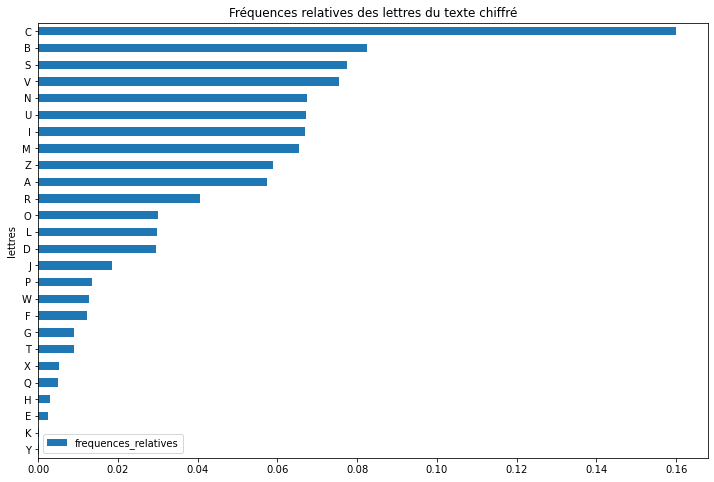

In [8]:
#importations des packages pour l'analyse fréquentiel
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt

text_file = open("page02_chiffree.txt")
file_content = text_file.read()
text_file.close()
# convertir la chaine de caractère en liste avec chaque élément un caractère
lettres_liste = list(file_content)

# fréquence de chaque lettre
lettres_freq = Counter(lettres_liste)



# convertir lettres_freq dans un df pandas 
df = pd.DataFrame.from_dict(lettres_freq, orient='index').reset_index()
df = df.rename(columns={'index':'lettres', 0:'frequences'})

# garder les 26 lettres
df = df.loc[df['lettres'].isin(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])]

df['frequences_relatives']=df['frequences']/df['frequences'].sum()
df = df.sort_values('frequences_relatives')

#fréquence des bigrammes
bigrammes_freq = Counter(map(''.join, zip(lettres_liste, lettres_liste[1:])))
# convertir lettres_freq dans un df pandas 
df2 = pd.DataFrame.from_dict(bigrammes_freq, orient='index').reset_index()
df2 = df2.rename(columns={'index':'bigrammes', 0:'frequences'})

# charger la fréquence des lettres dans une langue dans un csv
#fr_freq = pd.read_csv("frequences.csv")
#df = pd.merge(df,fr_freq, on="lettres")
# frequence attendue
#df['freq_attendue'] = np.round(df['frequences_relatives']*df['frequences'].sum(),0)

#figure de la fréquence des lettres du texte
df.plot(x="lettres", y="frequences_relatives",title="Fréquences relatives des lettres du texte chiffré", kind="barh", figsize=(12,8))

#df2.plot(x="bigrammes", y="frequences_relatives",title="Fréquences relatives des bigrammes du texte chiffré", kind="barh", figsize=(12,8))

print(file_content)


In [ ]:
#première étape : générer une clé aléatoire 
#on veut partir de qqch, même si c'est mauvais
new_cle={'a': 'M', 'b': 'V', 'c': 'G', 'd': 'C', 'e': 'J', 'f': 'Q', 'g': 'I', 'h': 'P', 'i': 'A', 'j': 'S', 'k': 'H', 'l': 'B', 'm': 'O', 'n': 'Z', 'o': 'F', 'p': 'U', 'q': 'R', 'r': 'T', 's': 'W', 't': 'D', 'u': 'E', 'v': 'N', 'w': 'K', 'x': 'Y', 'y': 'X', 'z': 'L', ' ': ' ', '\n': '\n'}
print(new_cle)
#et charger le texte chiffré dans une variable:
text_file = open("page02_chiffree.txt")
texte_chiffre_subsitution = text_file.read()
text_file.close()
#fct pour avoir la key depuis la value
def get_key(val,mydict):
    for key, value in mydict.items():
         if val == value:
             return key
    return "key doesn't exist"
while True:
    minuscule = input("Donner l'élément de la clé en clair (minuscule),XXX pour quitter : ")
    if minuscule =="XXX":
        break
    majuscule = input("Donner l'élément de la clé chiffré (MAJUSCULE),XXX pour quitter : ")
    if majuscule=="XXX":
        break
    key =  get_key(majuscule,new_cle)
    new_cle[minuscule], new_cle[key] = new_cle[key], new_cle[minuscule]
    print("Voici la clé mise à jour : ")
    print(new_cle)
#maintenant on dechiffre le texte avec la clé
texte_clair=dechiffre(new_cle, texte_chiffre_subsitution)
print(texte_clair)
        

In [3]:
bigrammes_freq

Counter({'  ': 214,
         ' D': 81,
         'DC': 28,
         'C ': 291,
         ' F': 47,
         'FN': 59,
         'N ': 40,
         ' I': 51,
         'IA': 51,
         'AS': 9,
         'S ': 168,
         ' R': 123,
         'RI': 25,
         'IS': 43,
         'SC': 46,
         'CM': 95,
         'MU': 69,
         'U ': 166,
         ' L': 101,
         'LZ': 38,
         'ZN': 76,
         'NV': 62,
         'VS': 5,
         'SN': 22,
         'NI': 31,
         'IJ': 8,
         'JI': 10,
         'IU': 61,
         ' A': 102,
         'AC': 98,
         'LV': 34,
         'VZ': 31,
         'ZG': 14,
         'GC': 16,
         'CS': 100,
         'SS': 36,
         'CN': 44,
         'V ': 97,
         'D ': 19,
         ' C': 113,
         'SU': 28,
         'NC': 34,
         ' J': 39,
         'JZ': 26,
         'ZA': 6,
         'AR': 3,
         'RC': 67,
         'CO': 20,
         'OZ': 19,
         'ZV': 36,
         'VU': 10,
         'JC': 29,
        

In [5]:
df2

,bigrammes,frequences
0,,214
1,D,81
2,DC,28
3,C,291
4,F,47
...,...,...
284,DN,2
285,IN,1
286,DY,1
287,Y,1
